In [1]:
import os
import keras
import tensorflow as tf
from tensorflow.keras.applications import inception_v3 as inc_net
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
from lime import lime_image
import numpy as np

%matplotlib inline
print('Notebook run using keras:, tf.__version__')

Notebook run using keras:, tf.__version__


In [2]:
inet_model = inc_net.InceptionV3()

In [3]:
def transform_img_fn(path_list):
  print(path_list)
  img = image.load_img(path_list, target_size=(299, 299))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = tf.keras.applications.inception_v3.preprocess_input(img)
  return img

../data/cat-and-dog.jpg
('n02099712', 'Labrador_retriever', 0.7636948)
('n02093428', 'American_Staffordshire_terrier', 0.02343626)
('n02099601', 'golden_retriever', 0.010865254)
('n02109047', 'Great_Dane', 0.009054179)
('n02108422', 'bull_mastiff', 0.009033355)


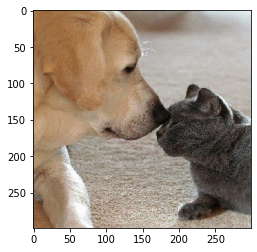

In [4]:
images = transform_img_fn('../data/cat-and-dog.jpg')
plt.imshow(images[0] / 2 + 0.5)
preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

In [5]:
explainer = lime_image.LimeImageExplainer()

In [6]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0].astype('double'), inet_model.predict, top_labels=5, hide_color=0, num_samples=1000)


Wall time: 33.1 s


In [7]:
from skimage.segmentation import mark_boundaries

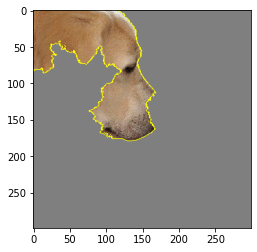

In [8]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

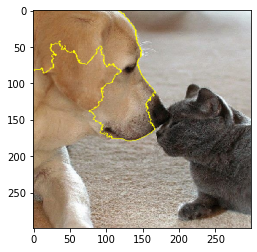

In [9]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))